Dobieram sinusy(tak jak w przedostatniej prezentacji) do trzech dni i licze wartosc otrzymanej funkcji dla dnia czwartego.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy

In [243]:
raw_data = pd.read_csv("data\\solar_stuff\\solar_long.csv", index_col='period_end').ghi
raw_data.index = pd.to_datetime(raw_data.index)

In [244]:
data = raw_data.resample('h').mean()['2022-12-29': '2023-12-31']

In [245]:
print(data)

period_end
2022-12-29 00:00:00+00:00    0.0
2022-12-29 01:00:00+00:00    0.0
2022-12-29 02:00:00+00:00    0.0
2022-12-29 03:00:00+00:00    0.0
2022-12-29 04:00:00+00:00    0.0
                            ... 
2023-12-31 19:00:00+00:00    0.0
2023-12-31 20:00:00+00:00    0.0
2023-12-31 21:00:00+00:00    0.0
2023-12-31 22:00:00+00:00    0.0
2023-12-31 23:00:00+00:00    0.0
Freq: h, Name: ghi, Length: 8832, dtype: float64


In [246]:
data = data.reset_index()

In [247]:
def energy_func(x, a, b, c):
    temp = a * np.sin(2 * np.pi * b * x + c)
    return [t if t > 0 else 0 for t in temp]

In [248]:
predictions = []
for i in range(0, len(data.ghi), 24):
    x = data.ghi[i: i+24*3]
    energy_params = scipy.optimize.curve_fit(energy_func, x.index, x,
                                         p0=[x.std(),
                                             1 / 24,
                                             1])
    y = data.ghi[i+24*3: i + 24*4]
    predictions += energy_func(y.index, *energy_params[0])

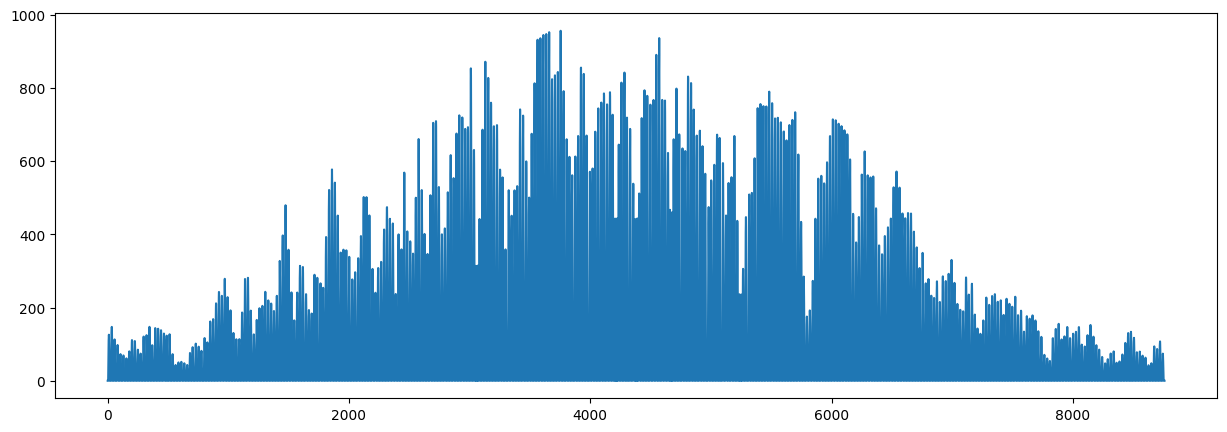

In [249]:
plt.figure(figsize=(15, 5))

plt.plot(predictions)

<Axes: >

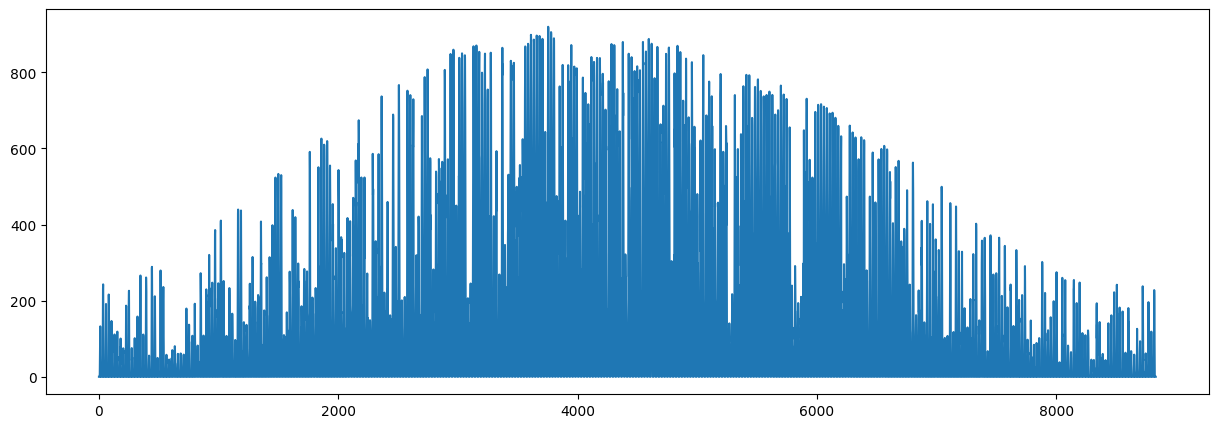

In [250]:
plt.figure(figsize=(15, 5))

data.ghi.plot()

In [251]:
len(predictions)/24

365.0

In [253]:
results = pd.Series(predictions)

In [254]:
results.to_csv("data\\ghi_predictions.csv")